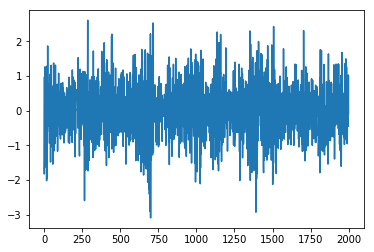

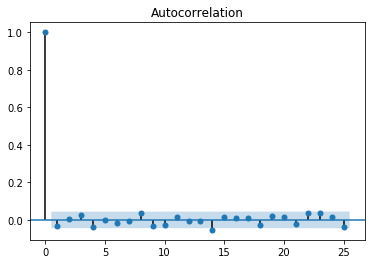

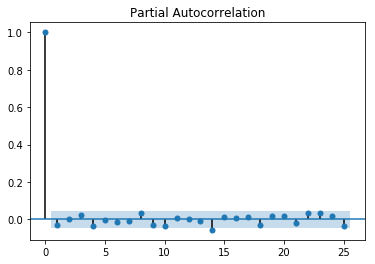

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data = pd.read_csv('Sessions2&3sim.csv', sep = ";", decimal = ",")
series1 = data.iloc[:200,0]
series2 = data.iloc[:200,1]
series3 = data.iloc[:200,2]
series4 = data.iloc[:200,3]
series5 = data.iloc[:200,4]
series6 = data.iloc[:2000,5]

y = series6

num_lags=25 # to discuss

plt.plot(y)
plt.show()
plot_acf(y,lags=num_lags)
plt.show()
plot_pacf(y,lags=num_lags,method="ols")
plt.show()


In [20]:
from scipy.stats import kurtosis, skew

# Basic statistics
mean = np.mean(y)
std = np.std(y)
kurtosis = kurtosis(y)
skewness = skew(y)

print("Mean",mean,"Standard deviation",std,"Skewness", skewness, "Kurtosis",kurtosis)


Mean -0.080695 Standard deviation 1.0642389496607418 Skewness -0.036591159804661266 Kurtosis -0.20697299606250574


In [34]:
#from pmdarima.arima.utils import ndiffs, nsdiffs
import statsmodels as sm

# Ho: the process is not stationary. We need, at least, a unit root
# H1: the process is stationary. We have to check different models (lags)


adf_test = sm.tsa.stattools.adfuller(y,maxlag=10) 
print("adf_test", adf_test) # first output "The test statistic", second output "p-value"

# print(sm.__version__)

adf_test (-1.3992024146139512, 0.582658431194377, 0, 199, {'1%': -3.4636447617687436, '5%': -2.8761761179270766, '10%': -2.57457158581854}, 534.7543646041522)


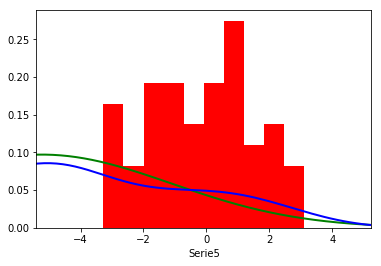

In [33]:
import seaborn as sns
import scipy.stats as st

mu = np.mean(y)
sigma = np.std(y)
x = np.linspace(mu -5*sigma, mu +5*sigma, 1000)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = plt.hist(y,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(y, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 5*std, mean + 5*std)

plt.show()




In [51]:
from scipy.stats import shapiro
# Normality test
saphiro = shapiro(y)

print("Saphiro",saphiro) # first output "The test statistic", second output "p-value"

import statsmodels.api as sm
box_test = sm.stats.acorr_ljungbox(y, lags=[20])

# print(box_test) # first output "The test statistic", second output "p-value"
print("LjungBox", box_test) # first output "The test statistic", second output "p-value"

Saphiro ShapiroResult(statistic=0.9968079924583435, pvalue=0.0003541434998624027)
LjungBox (array([23.03989223]), array([0.28683999]))


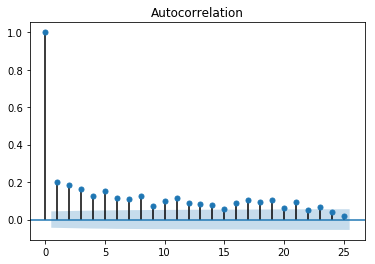

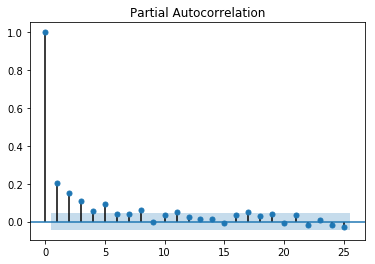

In [52]:
# plt.plot(y**2)
# plt.show()
plot_acf(y**2,lags=num_lags)
plt.show()
plot_pacf(y**2,lags=num_lags,method="ols")
plt.show()

In [25]:
box_test2 = sm.stats.acorr_ljungbox(y**2, lags=[20])
print(box_test2)

(array([22.9552172]), array([0.29099882]))


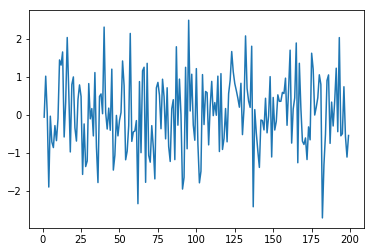

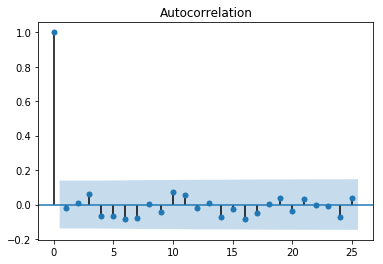

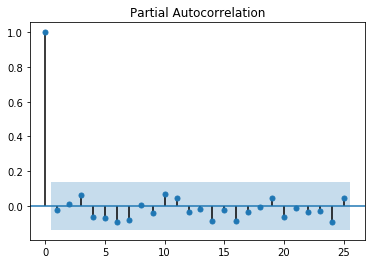

In [48]:
# In case we have to take some differences to the original series
z = y.diff().dropna()
# zz = y.diff(1).diff(1).dropna() # in case we need two differences
plt.plot(z)
plt.show()
plot_acf(z,lags=num_lags)
plt.show()
plot_pacf(z,lags=num_lags)
plt.show()

In [27]:
box_test_1 = sm.stats.acorr_ljungbox(z, lags=[20])
box_test_2 = sm.stats.acorr_ljungbox(z**2, lags=[20])
print("Box test z",box_test_1)
print("Box test z**2",box_test_2)

Box test z (array([37.68791247]), array([0.00966576]))
Box test z**2 (array([12.78574736]), array([0.8863862]))


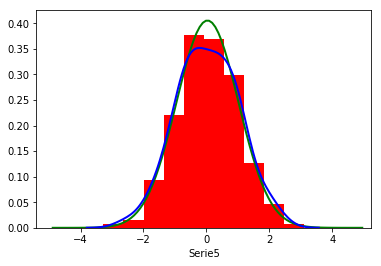

Saphiro ShapiroResult(statistic=0.9965448379516602, pvalue=0.9375375509262085)


In [49]:
mu = np.mean(z)
sigma = np.std(z)
x = np.linspace(mu -5*sigma, mu +5*sigma, 100)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = plt.hist(z,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(z, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 5*std, mean + 5*std)

plt.show()
from scipy.stats import shapiro
# Normality test
saphiro = shapiro(z)

print("Saphiro",saphiro) # first output "The test statistic", second output "p-value"

# Analyzing the real time series

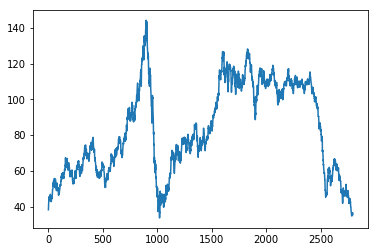

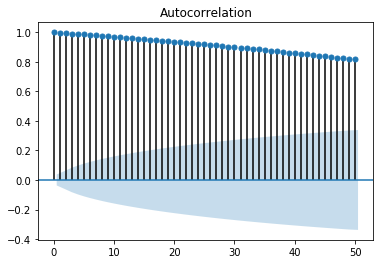

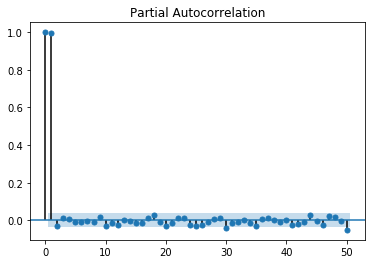

In [40]:
data = pd.read_csv("Sessions2&3real.csv", sep = ";", decimal = ",")
spot = data.iloc[:,0]
y = spot

num_lags=50

plt.plot(y)
plt.show()
plot_acf(y,lags=num_lags)
plt.show()
plot_pacf(y,lags=num_lags)
plt.show()

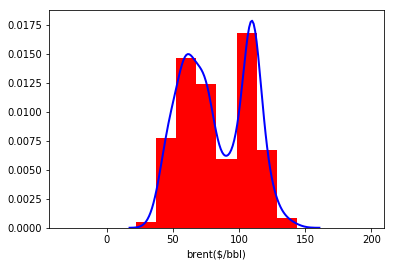

Saphiro ShapiroResult(statistic=0.9431533217430115, pvalue=1.560299244431198e-31)
mean 82.88516446192341 std 25.30023024440408


In [12]:
saphiro = shapiro(y)
mean = np.mean(y)
std = np.std(y)
mu = np.mean(y)
sigma = np.std(y)

ax = plt.hist(y,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(y, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 5*std, mean + 5*std)

plt.show()
print("Saphiro",saphiro)
print("mean",mean,"std",std)

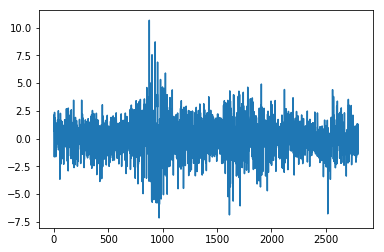

In [41]:
#returns = np.log(spot).diff().dropna() # we take log first and then one differente, diff(log(spot))
#z = returns
z = y.diff().dropna()

plt.plot(z)

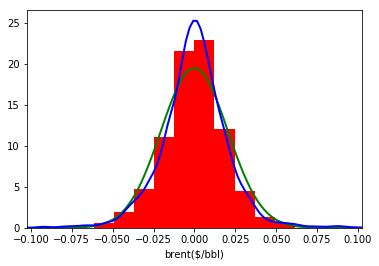

In [14]:
mean = np.mean(z)
std = np.std(z)
mu = np.mean(z)
sigma = np.std(z)
x = np.linspace(mu -5*sigma, mu +5*sigma, 100)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = plt.hist(z,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(z, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 5*std, mean + 5*std)

plt.show()

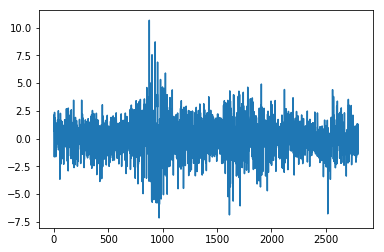

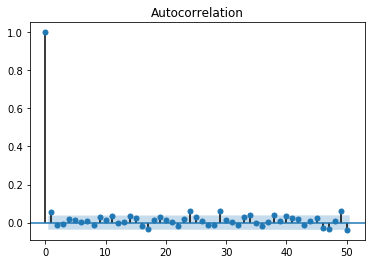

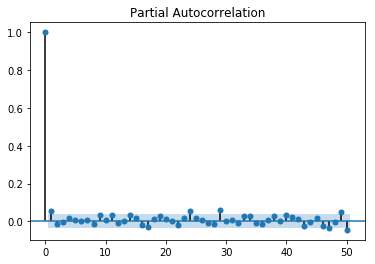

In [42]:
plt.plot(z)
plt.show()
plot_acf(z,lags=num_lags)
plt.show()
plot_pacf(z,lags=num_lags)
plt.show()

In [16]:
from scipy.stats import shapiro
# Normality test
saphiro = shapiro(z)

print("Saphiro",saphiro) # first output "The test statistic", second output "p-value"

import statsmodels.api as sm
box_test = sm.stats.acorr_ljungbox(z, lags=[50])

print("LjungBox", box_test) # first output "The test statistic", second output "p-value"

Saphiro ShapiroResult(statistic=0.9624509811401367, pvalue=2.402864770624962e-26)
LjungBox (array([107.90908414]), array([3.88176332e-06]))


In [17]:

import statsmodels.api as sm
box_test2 = sm.stats.acorr_ljungbox(z**2, lags=[20])

print("LjungBox", box_test2) # first output "The test statistic", second output "p-value"

LjungBox (array([2076.3314359]), array([0.]))


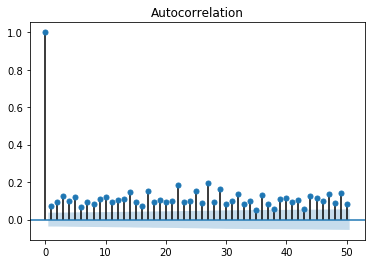

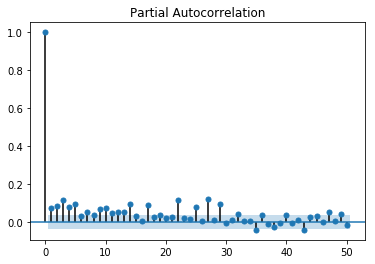

In [43]:
# plt.plot(z**2)
# plt.show()
plot_acf(z**2,lags=num_lags)
plt.show()
plot_pacf(z**2,lags=num_lags)
plt.show()